### <center>Imbalanced Learn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import RocCurveDisplay,accuracy_score,confusion_matrix

In [2]:
data = sns.load_dataset('titanic')
data.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [4]:
data.isnull().mean()*100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [5]:
data.drop(columns =['embarked','deck','alive','alone'],inplace=True)

In [6]:
data.age.fillna(data.age.mean(),inplace=True)

In [7]:
data.isnull().mean()*100

survived       0.000000
pclass         0.000000
sex            0.000000
age            0.000000
sibsp          0.000000
parch          0.000000
fare           0.000000
class          0.000000
who            0.000000
adult_male     0.000000
embark_town    0.224467
dtype: float64

In [8]:
le = LabelEncoder()

In [9]:
for i in data.columns:
    if data[i].dtype != 'int64' and 'float64':
        data[i] = le.fit_transform(data[i])   

In [10]:
data.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town
0,0,3,1,28,1,0,18,2,1,1,2
1,1,1,0,52,1,0,207,0,2,0,0
2,1,3,0,34,0,0,41,2,2,0,2
3,1,1,0,48,1,0,189,0,2,0,2
4,0,3,1,48,0,0,43,2,1,1,2


In [11]:
sc = StandardScaler()

In [12]:
x = data.iloc[:,1:].values
y = data.iloc[:,0].values

In [13]:
x = sc.fit_transform(x)

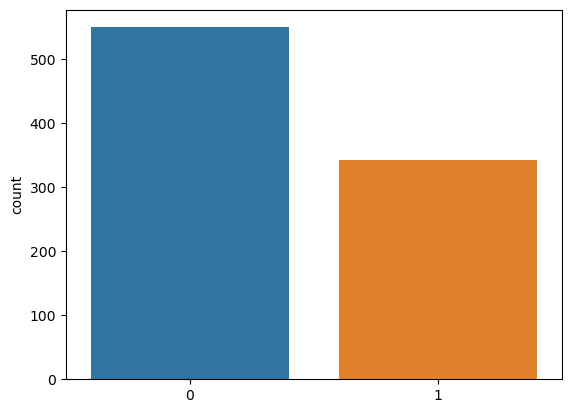

In [14]:
sns.countplot(x=y);

### Over Sampling

In [15]:
from imblearn.over_sampling import RandomOverSampler

In [16]:
oversample = RandomOverSampler(sampling_strategy='minority')

In [17]:
x_over,y_over = oversample.fit_resample(x,y)

In [18]:
y_over

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

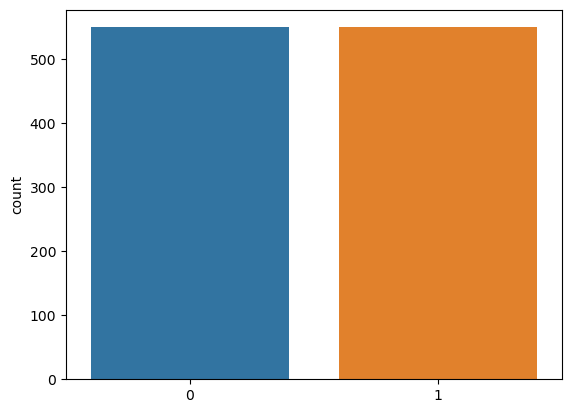

In [19]:
sns.countplot(x=y_over);

### Under Sampling

In [20]:
from imblearn.under_sampling import RandomUnderSampler

In [21]:
undersample = RandomUnderSampler()

In [22]:
x_under,y_under = undersample.fit_resample(x,y)

In [23]:
y_under

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

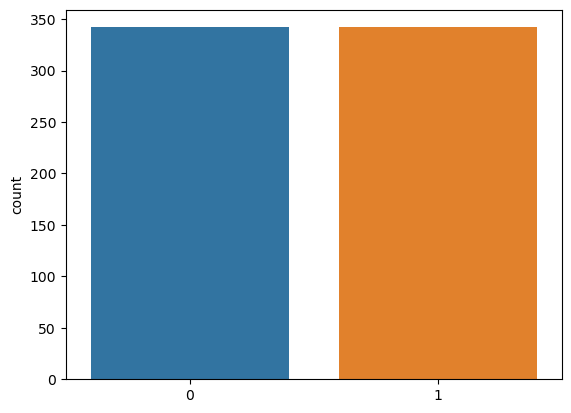

In [24]:
sns.countplot(x=y_under);

SMOTE, ADASYN: Synthetic Minority Oversampling Technique (SMOTE) and the Adaptive Synthetic (ADASYN) are 2 methods used in oversampling. These also generate low examples but ADASYN takes into account the density of distribution to distribute the data points evenly. 


In [25]:
from imblearn.over_sampling import SMOTE

In [26]:
smote = SMOTE()

In [27]:
x_smote,y_smote = smote.fit_resample(x,y)

In [28]:
y_smote

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

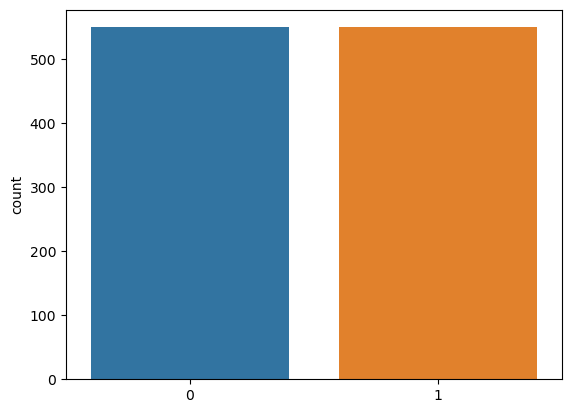

In [29]:
sns.countplot(x=y_smote);

In [30]:
from imblearn.over_sampling import ADASYN

In [31]:
adasyn = ADASYN()

In [32]:
x_adasyn,y_adasyn = adasyn.fit_resample(x,y)

In [33]:
y_adasyn

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

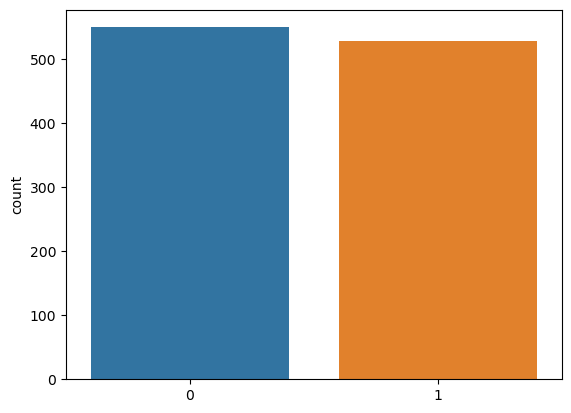

In [34]:
sns.countplot(x=y_adasyn);

In [35]:
models = {
    'LogisticRegression': LogisticRegression(),
    'DecissionTreeClassifier':DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier()}

#### Model Selection Using Cross Validation

In [36]:
for name,model in models.items():
    Scores = cross_val_score(model,x,y,scoring = 'accuracy',cv=10,n_jobs=-1)
    print('cross validation model : {}'.format(name))
    print('mean score :',np.mean(Scores)*100)
    print('*'*50)
    

cross validation model : LogisticRegression
mean score : 81.8214731585518
**************************************************
cross validation model : DecissionTreeClassifier
mean score : 79.46067415730337
**************************************************
cross validation model : RandomForestClassifier
mean score : 81.1498127340824
**************************************************
cross validation model : AdaBoostClassifier
mean score : 81.37453183520599
**************************************************
cross validation model : GradientBoostingClassifier
mean score : 82.3832709113608
**************************************************
cross validation model : KNeighborsClassifier
mean score : 81.8227215980025
**************************************************
